# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: **Shashank Iyer**
*   Your **student number**: **1004859806**



##**Marking Scheme:**

This project is worth **10 marks** of your final grade plus **One bonus mark**. 

There is no explicit grading for vectorized coding for this project. The vectorized coding will be tested in Q6. The grade of that question will be given based upon the ranking of your training time. **"Vectorized Coding" => "Faster Execution" => Higher Grade! :)**

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial.


##**Important Note:**



1] Start this lab as early as possible, so that you understand concepts in Tutorial well & get enough time to implement Exercise. 
 
2] Provide a graphical representation of data wherever necessary.  

3] This Project contains 6 questions worth a total of 10 points. Because projects will help
you learn things that are complementary to what we covered in class, they should be completed on
your own. Otherwise, you will not learn from taking this course and you are harming yourself.

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the b term? It is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

- Y is the predicted value ($h_w(x)$)
- w₀ is the bias term.
- w₁,…,wₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here"

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (w and b), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters w and b. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

Here the term $\alpha$ is defined as the learning rate.

## LINEAR REGRESSION - EXERCISE

## Question 1 - Data Prepration [1 mark]

1. Normalize the data using StandardScaler from sklearn. **Dropped the unnamed column, split the dataframe into features and target variable, x & y respectively.**
2. Split the multivariate data into training/validation data- 20% validation data, 80% training data (Note: While splitting use the value of random state=6) **Split the multivariate data into train (80%) and validation/test (20%) with a random state of 6. Fit the standard scalar in the training data and then transformed the training and testing data using the same standard scalar. Added the bias feature value = 1 in the first column in order to perform gradient descent later on**
3. Standardize the data.**Not required as told by the Professor**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import datetime
import time
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")
col = ['Unnamed: 0']
df = df.drop(col, axis = 1)
#splitting the data
X=df.drop('MEDV', axis=1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6) #random state = 6, so that splitting takes place in specific order, not random element wise

#scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = pd.DataFrame(scaler.transform(X_train))
X_test_std = pd.DataFrame(scaler.transform(X_test))

#to add 1 in the first column
X_train_std_1 = np.hstack((np.ones(np.size(X_train_std,0)).reshape(-1,1), X_train_std))
X_test_std_1 = np.hstack((np.ones(np.size(X_test_std,0)).reshape(-1,1), X_test_std))




## Question 2 - Direct Solution [1 marks]

Impelement the direct solution for linear regression on the dataset above and find best lambda.

1. Plot Train error and Validation error as a function of the lambda regularizer. **Used the direct/closed solution methodology to update weights and minimize the cost function by reaching its local minima. The plot shows the MSE train and MSE test/validation scores on the y axis, while lambda (regularizer parameter) is plotted on the x axis. Lambda helps reduce the coefficients/weights of our input variables**
2. What is the best lambda where the best fit occurs? Use this best lambda from here on out. **The best lambda value obtained as seen in the figure is 9. This is because at the x value of 9, our validation MSE value is at its minimum.**

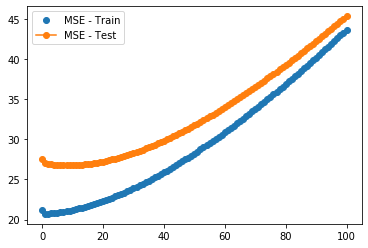

In [19]:
# Calculating analytical solution for training data

mse_train = []
mse_test = []
f=17
for lamb in range(0,101):
    
    w = np.dot(np.linalg.inv(np.dot(X_train_std_1.T, X_train_std_1) + (lamb)*np.identity(f)), np.dot(X_train_std_1.T, y_train))
    yPred_train = np.dot(X_train_std_1, w)
    yPred_test = np.dot(X_test_std_1, w)
    mse_train.append(mean_squared_error(yPred_train, y_train))
    mse_test.append(mean_squared_error(yPred_test, y_test))

mse_train = np.asarray(mse_train)
mse_test = np.asarray(mse_test)
lamb_ar = np.arange(0,101)

plt.plot(lamb_ar, mse_train, 'o', label='MSE - Train')
plt.plot(lamb_ar, mse_test, 'o-', label='MSE - Test')

plt.legend()
plt.show()


## Question 3 - Gradient Descent [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate $\alpha$ of 1e-2. You should compute the gradients yourself! **The gradient descent function below is being computed, where the weights are being random values using the np.random function and the predicted y value for each epoch is the dot product of the weights and the x values. The computed gradient is then multiplied with the learning rate to give the step size which is then subtracted from the original random weight to update the weight. The MSE value is computed on the training data with a learning rate of 0.01 and lambda value of 9 for 9000 iterations.**

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the direct solution with the same lambda. **The approach adopted to compare the results of the gradient descent vs the direct/closed solution was to obtain a percentage difference value for each of the weights of the 17 features. The percentage difference can be seen below, the only stark difference in the percentage values were for feature 3,5,15&16**

In [20]:
1.#gradient descent method
y_train = np.asarray(y_train).reshape(-1,1)

def gradient_descent(X,y,lamda=9,learningrt=0.01,itera=400):
    
    mse_graddesc = [0]
  
    np.random.seed(0)
    w_rand = np.random.randn(17, 1)
  
    for i in range(0,itera):
        
        ypredgrad = np.dot(X_train_std_1,w_rand)
        w_rand = w_rand - learningrt*(1/len(y_train))*(np.dot(X_train_std_1.T, (ypredgrad-y_train))+(lamda*w_rand))
        mse_graddesc.append(mean_squared_error(ypredgrad, y))
        if abs(mse_graddesc[-1] - mse_graddesc[-2]) < 0.000001:
            break
    return w_rand, mse_graddesc, i+1

w_graddesc, mseq3, epoch = gradient_descent(X_train_std_1, y_train, lamda=9, learningrt=0.01, itera=9000)
print("Total epochs", epoch)
2. # direct solution with lambda = 9
f = 17
lamb=9
w_final = np.dot(np.linalg.inv(np.dot(X_train_std_1.T, X_train_std_1) + (lamb)*np.identity(f)), np.dot(X_train_std_1.T, y_train))

#comparison of w (direct) with gradient descent w

for i in range(np.size(X_train_std_1,1)):
    
    perc = ((w_final[i,0]-w_graddesc[i,0])/w_final[i,0])*100
    print("the results closely match with the percentage difference values", abs(perc))

 

Total epochs 6200
the results closely match with the percentage difference values 7.661238126003886e-13
the results closely match with the percentage difference values 0.26792177535134176
the results closely match with the percentage difference values 30.131475269348446
the results closely match with the percentage difference values 9.090114480612835
the results closely match with the percentage difference values 27.0063316172504
the results closely match with the percentage difference values 0.14625485901654092
the results closely match with the percentage difference values 0.2303609643681071
the results closely match with the percentage difference values 4.440387916087614
the results closely match with the percentage difference values 0.020407345983089454
the results closely match with the percentage difference values 0.2151419696950924
the results closely match with the percentage difference values 0.6178648822207964
the results closely match with the percentage difference values 0.

## Question 4 - Mini-batch size and learning rate [2 marks]

1- Impelement Mini-batch Gradient Descent. **There are two function created to perform mini batch gradient descent. The first one is to create batches based on the batch size parameter and passing the X_train and Y_train values. The second function is to compute gradient descent on each of the batches, while calculating the MSE train and test values.**

2- Sweep different values for the batch size with a fixed learning rate and report your findings on a plot (Training Error, Test Error,...). **Different batch size values are kept in a list and the train MSE values are plotted in two graphs, normal and zoomed version and the same is done for the test MSE values. Based on the two zoomed plots for train and test MSE with different batch sizes in its key - it is clearly evident that the batch size of 256 and 404 gave the best results in terms of fastest convergence for both the training and test error, with the least amount of noise/maximum smoothness.**

3- Select the best batch sized based on fastest convergence (number of times you update the weights) and sweep the learning rate. Report your findings on a plot. **The batch size of 256 was chosen to sweep different learning rates and plot the train and test MSE values against the gradient updates in both normal and zoomed version. Based on the two zoomed plot for the train and test MSE against the gradient updates, it is pretty evident that the learning rate of 0.01 performed the best - ending up to be the best choice for the learning rate**


In [24]:
1.#fuunction to create batches

def batch(X_trainq5,y_trainq5,batch_size):
    batch_X = []
    batch_y = []
    q=-1
    for j in range(int(len(X_trainq5)/batch_size)):
        tempx = []
        tempy = []
        for k in range(batch_size):
            q=q+1
            tempx.append(X_trainq5[q])
            tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    if int(len(X_trainq5)%batch_size) != 0:
        for l in range(1):
            tempx = []
            tempy = []
            for m in range(int(len(X_trainq5)%batch_size)):
                q=q+1
                tempx.append(X_trainq5[q])
                tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    return batch_X,batch_y

In [25]:
1.# function for gradient descent

def batch_grad_desc (X,y,X_test,y_test,batch_size,learningrt,itera=400,lamda = 9):
    
    np.random.seed(0)
    w_randq5 = np.random.randn(17, 1) 
    mse_graddescq5 = [0]
    mse_gradtest = []
    for i in range (itera):
        
    #randomizing data
        dataq5 = np.hstack((X,y))
        rand_traindataq5 = np.random.permutation(dataq5)
        X_trainq5 = np.delete(rand_traindataq5,17,1) #1 means delete along column axis
        y_trainq5 = rand_traindataq5[:,17]
        batch_X, batch_y = batch(X_trainq5,y_trainq5,batch_size)
    #gradient descent
        for n in range(len(batch_X)):
            ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)
            w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
            ypredq5 = np.dot(X_trainq5,w_randq5)
            ypred_test = np.dot(X_test, w_randq5)
            mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
            mse_gradtest.append(mean_squared_error(ypred_test, y_test))    
        if abs(mse_graddescq5[-1] - mse_graddescq5[-2]) < 0.000001:
            break
    return mse_graddescq5, mse_gradtest

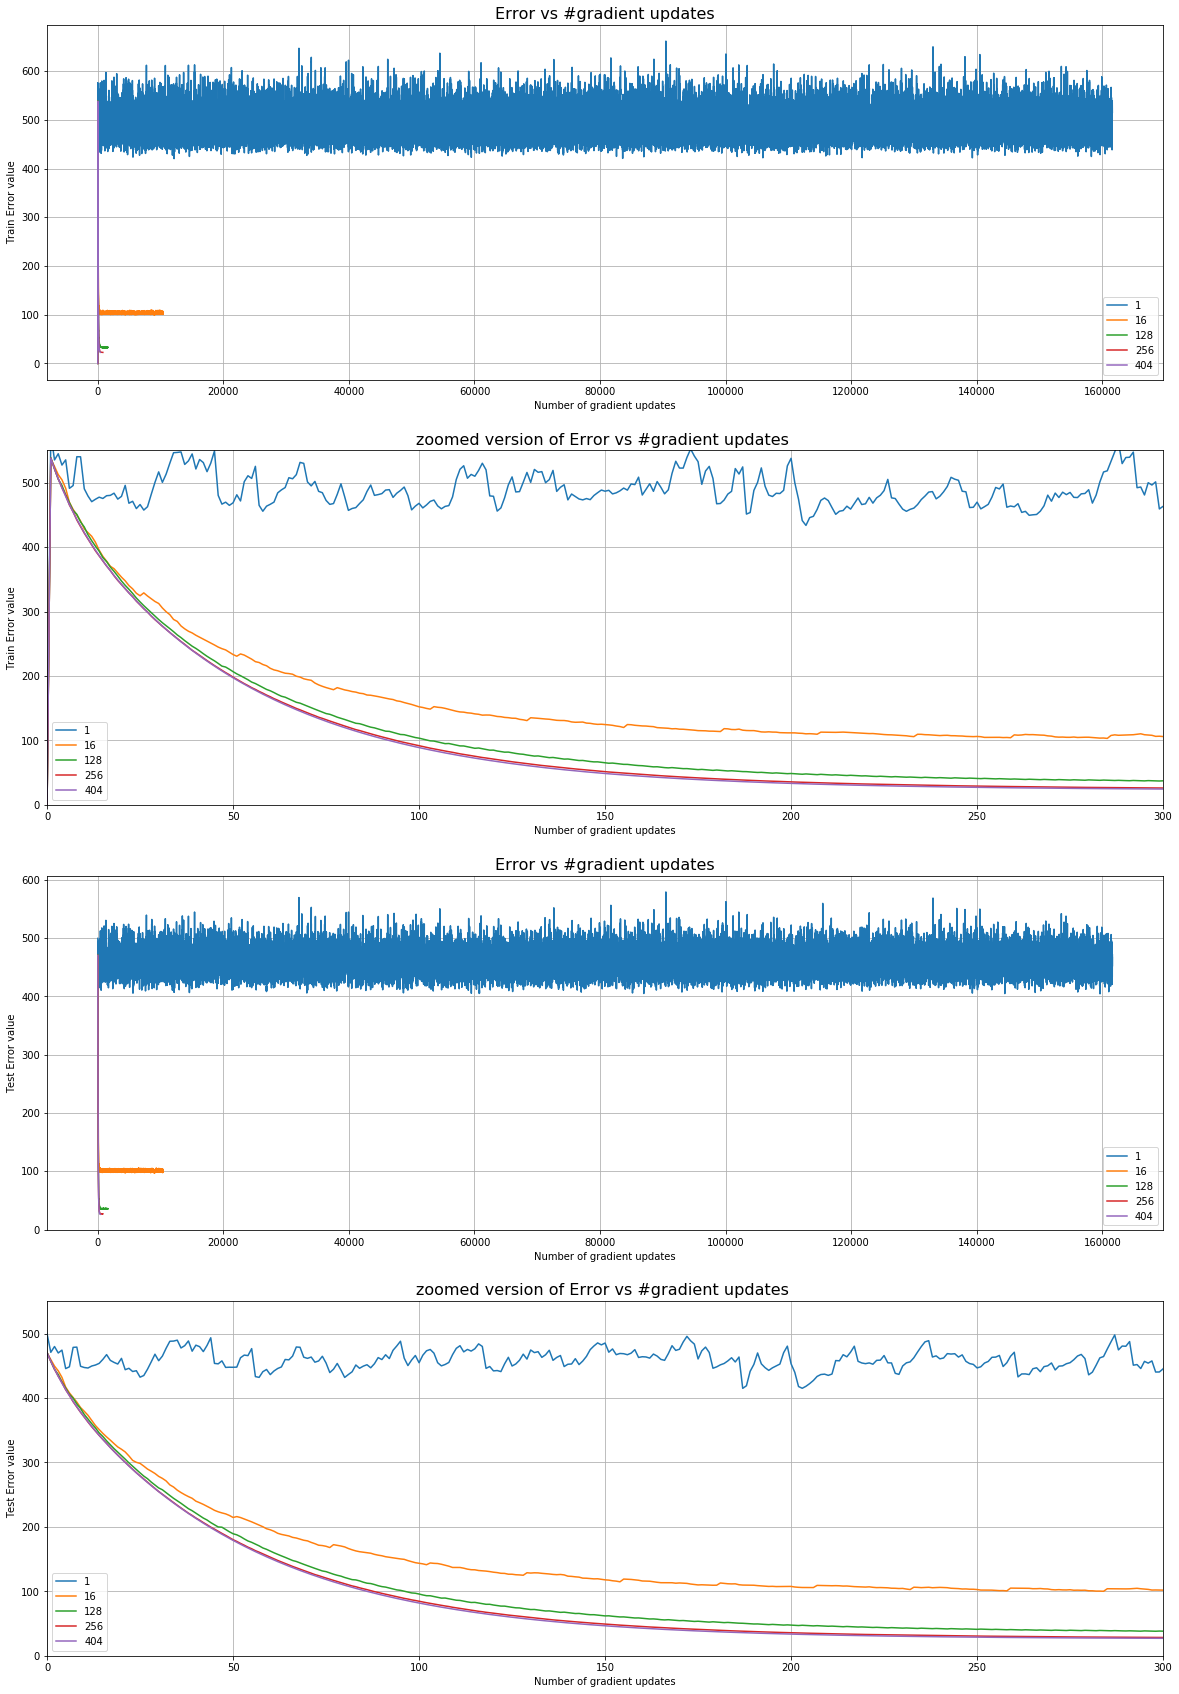

In [26]:
##2. Train & Test Error vs sweeping batch sizes and number of gradient updates based on the data points in each batch 
total_mseq5 = []
total_mse_test = []

for mb in [1,16,128,256,404]:
    mseq5 = batch_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, mb,0.01,itera=400, lamda=9)
    total_mseq5.append(mseq5[0])
    total_mse_test.append(mseq5[1])

fig, (ax1,ax2, ax3, ax4)=plt.subplots(4,1, figsize=(20,30))
key = ['1','16','128','256','404']
#Plotting error vs gradient updates
for i in range(len(total_mseq5)):
    ax1.plot(total_mseq5[i], label=key[i])
    ax1.legend()
    ax1.set_title('Error vs #gradient updates',fontsize=16)
    ax1.set_xlabel('Number of gradient updates')
    ax1.set_ylabel('Train Error value')
    ax1.grid()

for i in range(len(total_mseq5)):
    
    ax2.plot(total_mseq5[i], label=key[i])
    ax2.legend()
    ax2.set_xlim(0,300)
    ax2.set_ylim(0,550)
    ax2.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
    ax2.set_xlabel('Number of gradient updates')
    ax2.set_ylabel('Train Error value')
    ax2.grid()
    
for i in range(len(total_mse_test)):
    ax3.plot(total_mse_test[i], label=key[i])
    ax3.legend()
    ax3.set_title('Error vs #gradient updates',fontsize=16)
    ax3.set_xlabel('Number of gradient updates')
    ax3.set_ylabel('Test Error value')
    ax3.grid()
    
for i in range(len(total_mse_test)):
    
    ax4.plot(total_mse_test[i], label=key[i])
    ax4.legend()
    ax4.set_xlim(0,300)
    ax4.set_ylim(0,550)
    ax4.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
    ax4.set_xlabel('Number of gradient updates')
    ax4.set_ylabel('Test Error value')
    ax4.grid()

## 3. Based on the two plots, it is clearly evident that the batch size of 256 and 404 gave the best results in terms of fastest convergence for both the training and test error, with the least amount of noise/maximum smoothness. 

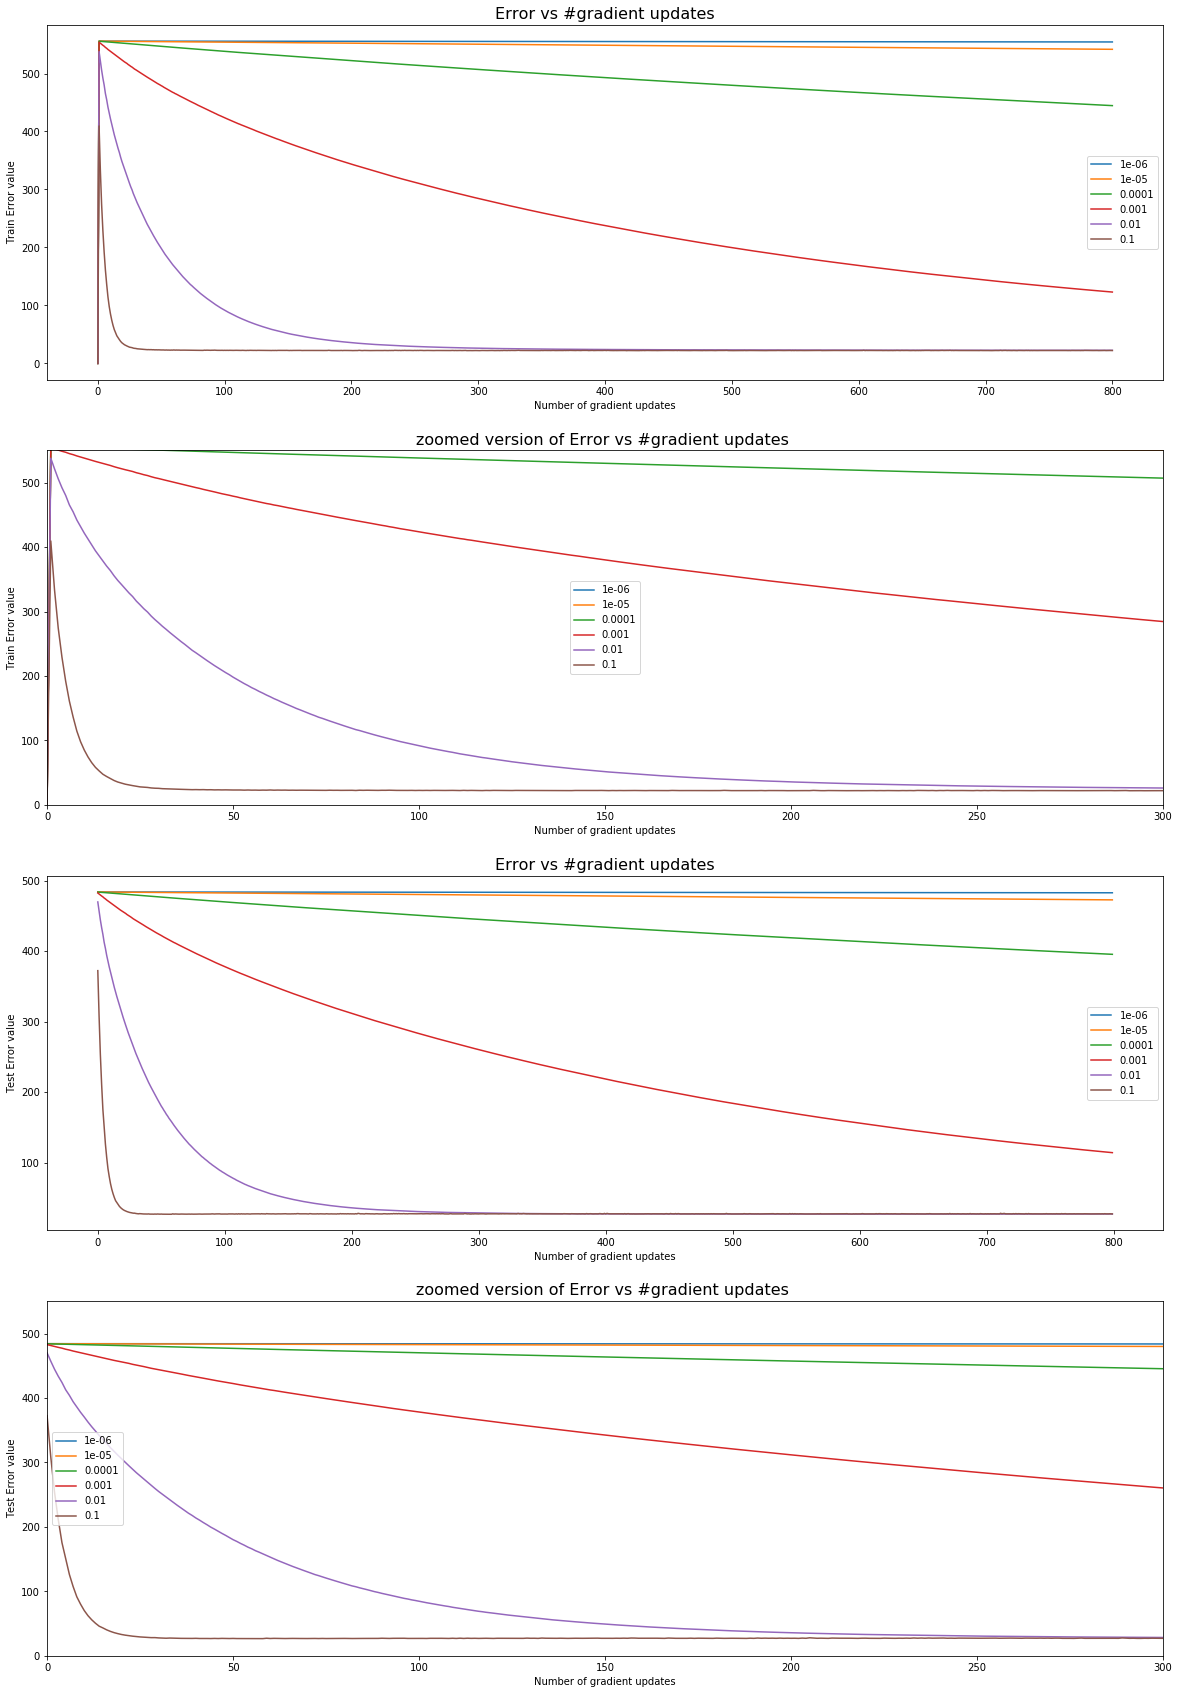

In [27]:
##4. Train & Test Error vs sweeping learning rates and number of gradient updates based on the data points in each batch 
learningrt_ar = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
total_mseq50 = []
total_mse_test1 = []
for i in range(6):
    mseq50 = batch_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, 256 ,learningrt = learningrt_ar[i] ,itera=400, lamda=9)
    total_mseq50.append(mseq50[0]) 
    total_mse_test1.append(mseq50[1])
    

fig, (ax1,ax2, ax3, ax4)=plt.subplots(4,1, figsize=(20,30))
key = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#Plotting error vs gradient updates
for i in range(len(total_mseq50)):
    ax1.plot(total_mseq50[i], label=key[i])
    ax1.legend()
    ax1.set_title('Error vs #gradient updates',fontsize=16)
    ax1.set_xlabel('Number of gradient updates')
    ax1.set_ylabel('Train Error value')
    ax1.grid()

for i in range(len(total_mseq50)):
    
    ax2.plot(total_mseq50[i], label=key[i])
    ax2.legend()
    ax2.set_xlim(0,300)
    ax2.set_ylim(0,550)
    ax2.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
    ax2.set_xlabel('Number of gradient updates')
    ax2.set_ylabel('Train Error value')
    ax2.grid()
    
for i in range(len(total_mse_test1)):
    ax3.plot(total_mse_test1[i], label=key[i])
    ax3.legend()
    ax3.set_title('Error vs #gradient updates',fontsize=16)
    ax3.set_xlabel('Number of gradient updates')
    ax3.set_ylabel('Test Error value')
    ax3.grid()
    
for i in range(len(total_mse_test1)):
    
    ax4.plot(total_mse_test1[i], label=key[i])
    ax4.legend()
    ax4.set_xlim(0,300)
    ax4.set_ylim(0,550)
    ax4.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
    ax4.set_xlabel('Number of gradient updates')
    ax4.set_ylabel('Test Error value')
    ax4.grid()

## Question 5 - Adaptive Learning rate [2 marks]

Impelement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. 
**The function used to perform adaptive learning rate is a tad bit different than the previous mini batch gradient descent function. Over here as the total number of iterations is 400 for example, we created an evenly spaced array of learning rate values between 0 and 0.1 (the initial value for learning rate passed into the function) using the np.linspace function. Thus, for each epoch it will choose a high learning rate and keep reducing the learning rate as the number of epochs keep increasing. Hence, this is the adaptive learning rate function implemented. The plots below show the train and test MSE values against the number of gradient updates/epochs and the smoothness of the curves elucidates the fact that an adaptive learning rate scheme is very useful**

In [28]:
1.#fuunction to create batches

def batch_adaptive(X_trainq5,y_trainq5,batch_size):
    batch_X = []
    batch_y = []
    q=-1
    for j in range(int(len(X_trainq5)/batch_size)):
        tempx = []
        tempy = []
        for k in range(batch_size):
            q=q+1
            tempx.append(X_trainq5[q])
            tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    if int(len(X_trainq5)%batch_size) != 0:
        for l in range(1):
            tempx = []
            tempy = []
            for m in range(int(len(X_trainq5)%batch_size)):
                q=q+1
                tempx.append(X_trainq5[q])
                tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    return batch_X,batch_y
1.# function for gradient descent

def batch_adapt_grad_desc (X,y,X_test,y_test,batch_size,learningrt,itera=400,lamda = 9):
    timehist = [] 
    mse_gradepoch = []
    batchtime = []
    np.random.seed(0)
    w_randq5 = np.random.randn(17, 1) 
    mse_graddescq5 = [0]
    mse_gradtest = []
    learningrt_array = np.linspace(0, learningrt, itera) ## specifying a new value for learning rt, for each iteration. Getting evenly spaced values for learning rt b/w 0 & 0.1
    for i in range(itera):
        
    #randomizing data
        dataq5 = np.hstack((X,y))
        rand_traindataq5 = np.random.permutation(dataq5)
        X_trainq5 = np.delete(rand_traindataq5,17,1) #1 means delete along column axis
        y_trainq5 = rand_traindataq5[:,17]
        batch_X, batch_y = batch_adaptive(X_trainq5,y_trainq5,batch_size)
    #gradient descent
        for n in range(len(batch_X)):
            ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)
            w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
            ypredq5 = np.dot(X_trainq5,w_randq5)
            ypred_test = np.dot(X_test, w_randq5)
            mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
            mse_gradtest.append(mean_squared_error(ypred_test, y_test))
        learningrt = learningrt_array[itera-i-1]
        if abs(mse_graddescq5[-1] - mse_graddescq5[-2]) < 0.000001:
            break            
        ##if i % 100 == 0:
    return mse_graddescq5, mse_gradtest, learningrt_array

In [29]:
x = batch_adapt_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, 256 ,learningrt = 0.1 ,itera=400, lamda=9)

Text(0, 0.5, 'Train Error value')

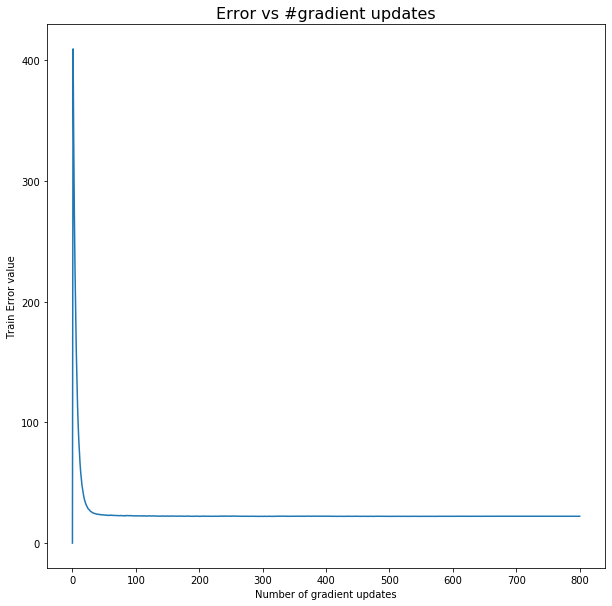

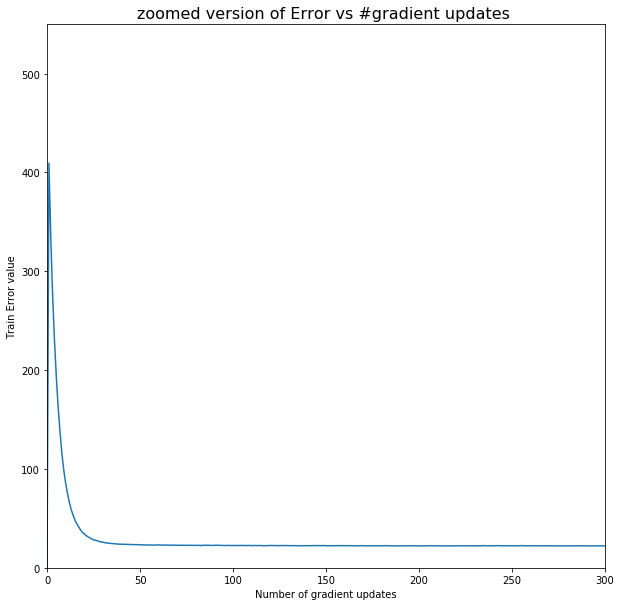

In [30]:
##TRAIN ERROR 

fig, ax1 = plt.subplots(1,1, figsize=(10,10))

ax1.plot(x[0])
ax1.set_title('Error vs #gradient updates',fontsize=16)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Train Error value')

fig, ax3 = plt.subplots(1,1, figsize = (10,10))
ax3.plot(x[0])
ax3.set_xlim(0,300)
ax3.set_ylim(0,550)
ax3.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
ax3.set_xlabel('Number of gradient updates')
ax3.set_ylabel('Train Error value')



Text(0, 0.5, 'Test Error value')

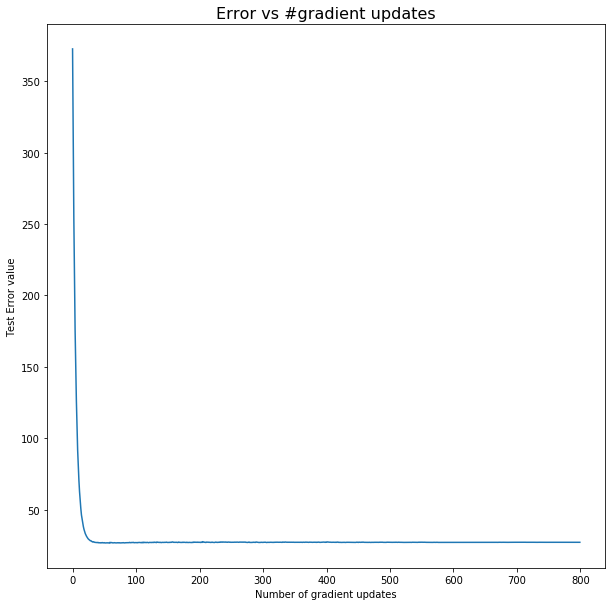

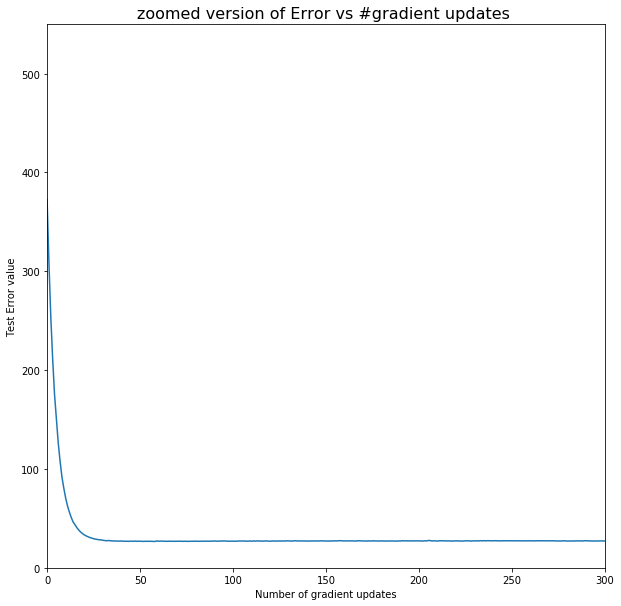

In [31]:
###TEST ERROR

fig, ax2 = plt.subplots(1,1, figsize=(10,10))

ax2.plot(x[1])
ax2.set_title('Error vs #gradient updates',fontsize=16)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Test Error value')

fig, ax4 = plt.subplots(1,1, figsize = (10,10))
ax4.plot(x[1])
ax4.set_xlim(0,300)
ax4.set_ylim(0,550)
ax4.set_title('zoomed version of Error vs #gradient updates ',fontsize=16)
ax4.set_xlabel('Number of gradient updates')
ax4.set_ylabel('Test Error value')

## Question 6 - Fastest Solution! [2 +1 Bonus marks]
Less training time, More marks!

So far, you learned alot about gradient descent. 
Now consider you are an Machine learning expert working for a huge corporation. One of the most important things you will face as an ML expert is to train and develope your models as fast & accurate as possible.

 In this part we want to find a mini-batch size and a learning rate adjustment scheme to train the model quickly. Use the Python time library to measure the training time (time you spend to find the weights). Repeat every case at least 10 times and report the average time (the machine that is running your code is also performing other tasks, averaging time will help you to have a better judgment about the performance of your model). You should train your model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error. 

 Elaborate your findings with help of tables/plots.

 Report your Best time, and Accuracy!
 
 **As evident from the markdown cells below that it took an average time of 1.37s to train my optimized mini batch gradient descent algorithm. The plots below show the different learning rate/mini batch size combinations. The most optimal learning rate and mini batch size combination that gave the least amount of noise in the plot of the test error were learning rate = 0.01 and mini batch size of 256. The percentage difference between the mse_test value for direct solution and the optimized mini batch gradient descent algorithm was 0.89%**

In [32]:
1.#fuunction to create batches

def batch_adaptive(X_trainq5,y_trainq5,batch_size):
    batch_X = []
    batch_y = []
    q=-1
    for j in range(int(len(X_trainq5)/batch_size)):
        tempx = []
        tempy = []
        for k in range(batch_size):
            q=q+1
            tempx.append(X_trainq5[q])
            tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    if int(len(X_trainq5)%batch_size) != 0:
        for l in range(1):
            tempx = []
            tempy = []
            for m in range(int(len(X_trainq5)%batch_size)):
                q=q+1
                tempx.append(X_trainq5[q])
                tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    return batch_X,batch_y
1.# function for gradient descent

def batch_q6_grad_desc (X,y,X_test,y_test,batch_size,learningrt,itera=400,lamda = 9):
    timehist = [] 
    mse_gradepoch = []
    batchtime = []
    np.random.seed(0)
    w_randq5 = np.random.randn(17, 1) 
    mse_graddescq5 = [0]
    mse_gradtest = []
    for i in range(itera):
        
    #randomizing data
        dataq5 = np.hstack((X,y))
        rand_traindataq5 = np.random.permutation(dataq5)
        X_trainq5 = np.delete(rand_traindataq5,17,1) #1 means delete along column axis
        y_trainq5 = rand_traindataq5[:,17]
        batch_X, batch_y = batch_adaptive(X_trainq5,y_trainq5,batch_size)
    #gradient descent
        for n in range(len(batch_X)):
            start = time.time()
            ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)
            w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
            ypredq5 = np.dot(X_trainq5,w_randq5)
            mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
            stop = time.time()
            time_dif = stop - start
            batchtime.append(time_dif)
            ypred_test = np.dot(X_test, w_randq5)
            ypredq5epoch = np.dot(X_trainq5,w_randq5)
            mse_gradtest.append(mean_squared_error(ypred_test, y_test))
            mse_gradepoch.append(mean_squared_error(ypredq5epoch, y_trainq5))
        if abs(mse_graddescq5[-1] - mse_graddescq5[-2]) < 0.000001:
            break 
    return mse_graddescq5, mse_gradtest, mse_gradepoch, batchtime

In [33]:
# # optimizing eeta and B for mse error grad descent

total_mseq6 = []
total_mse_test = []
total_mseq6epoch = []
total_timeq6 = []
learningrt_arq6 = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

for lr in learningrt_arq6:
    for mb in [1,16,128,256,404]:
        mseq6_train, mseq6_test, mseepochq6, btimeq6 = batch_q6_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, mb , lr ,itera=200, lamda=9)
        total_mseq6.append(mseq6_train)
        total_mse_test.append(mseq6_test)
        total_mseq6epoch.append(mseepochq6)
        total_timeq6.append(btimeq6)



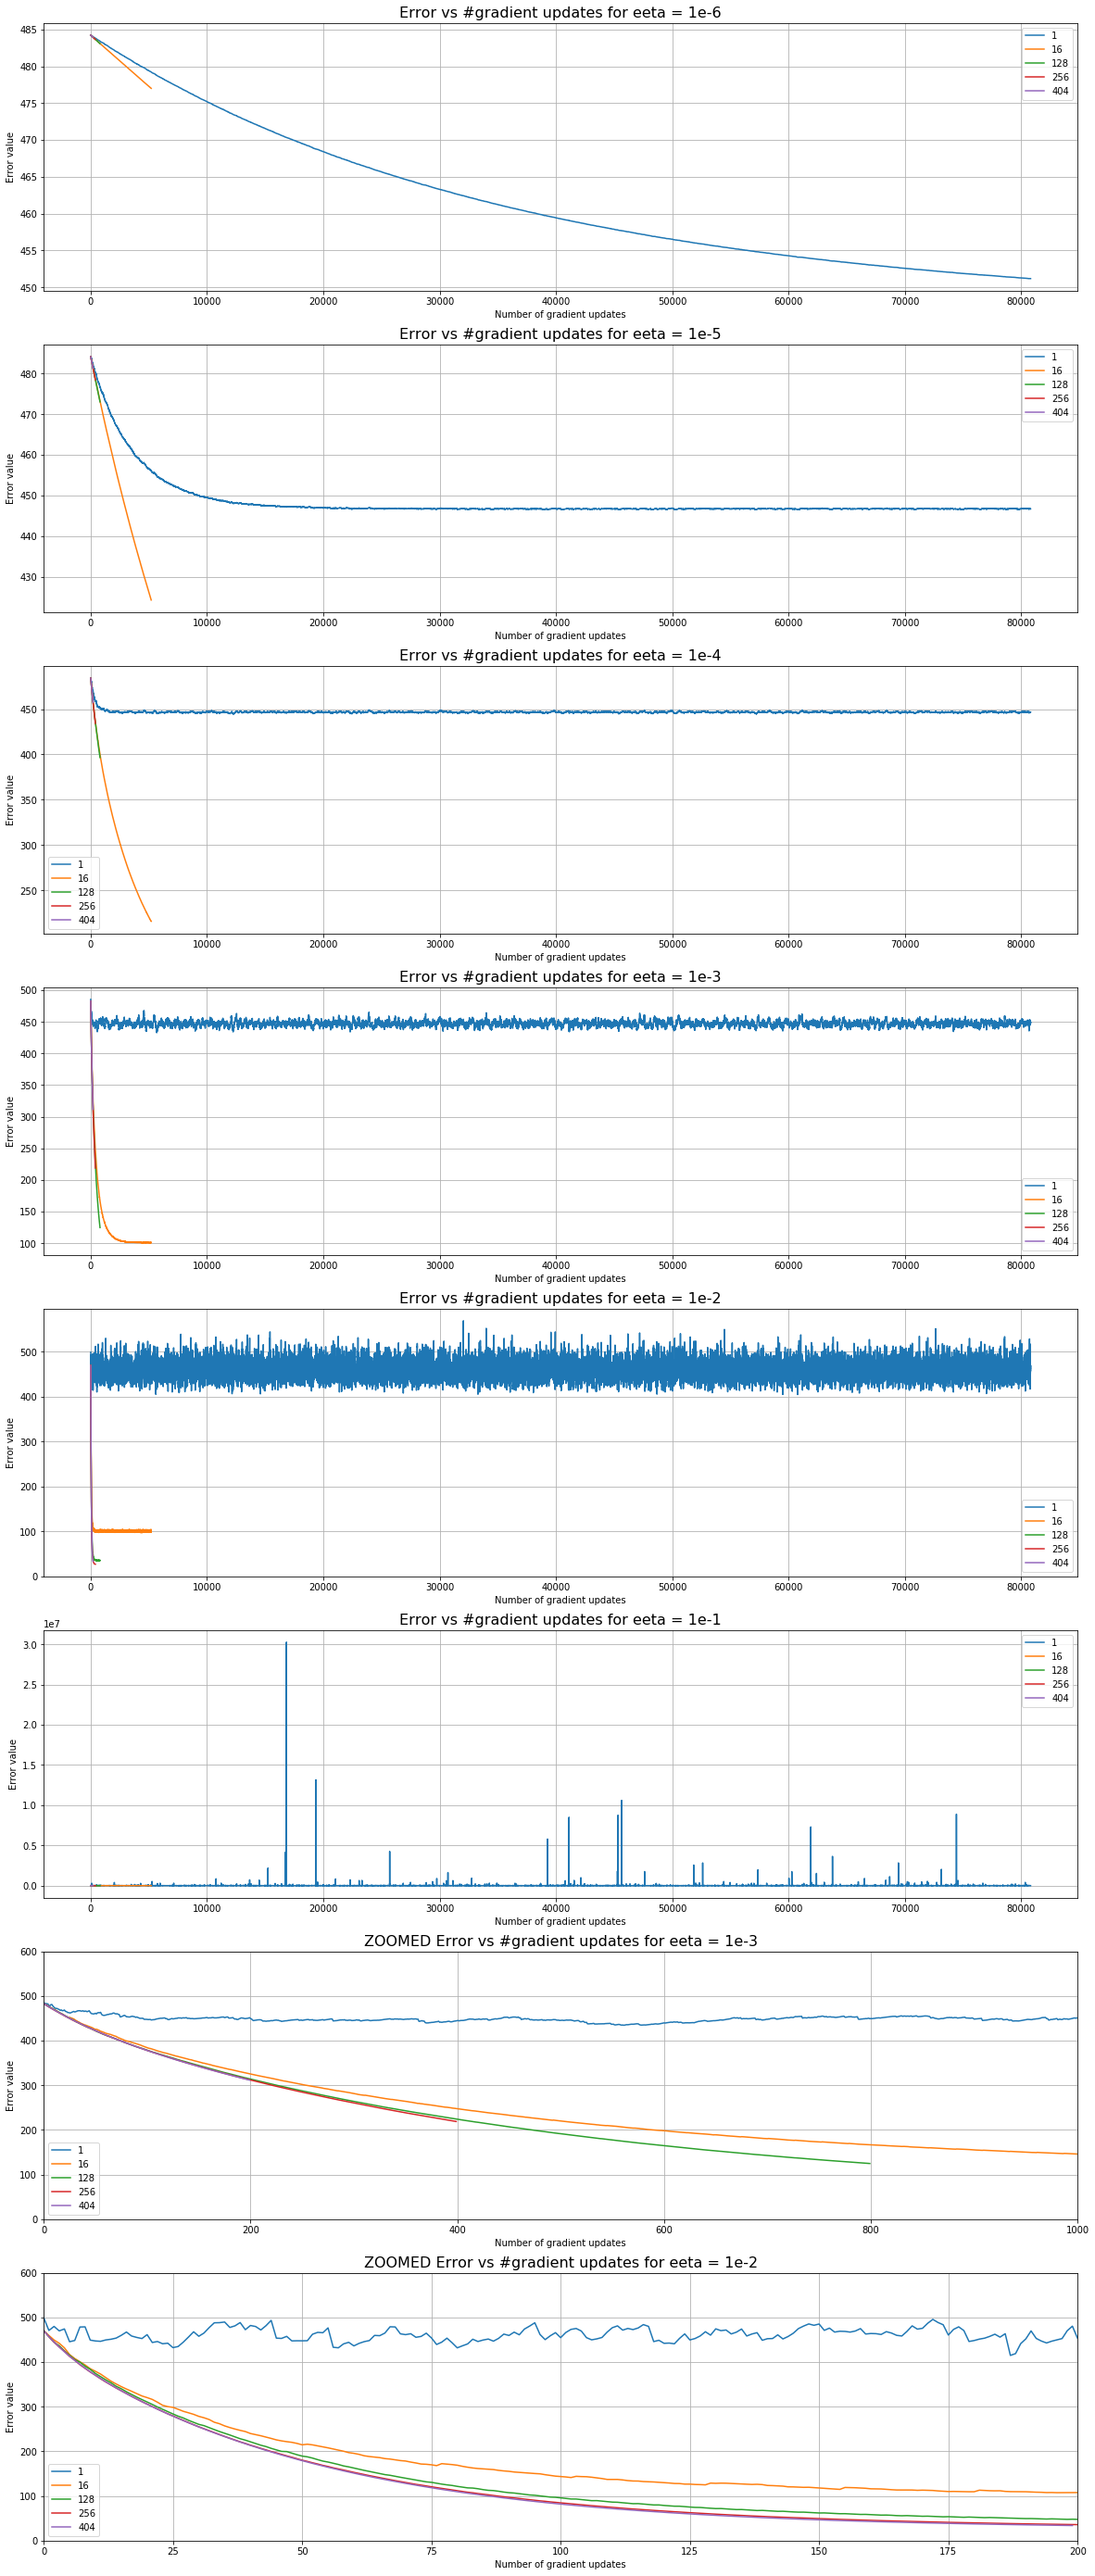

In [34]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)=plt.subplots(8,1, figsize=(20,50))
key = ['1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404','1','16','128','256','404']
#Plotting error vs gradient updates
for i in range(0,5):    
    ax1.plot(total_mse_test[i], label=key[i])
    ax1.legend()
    ax1.set_title('Error vs #gradient updates for eeta = 1e-6',fontsize=16)
    ax1.set_xlabel('Number of gradient updates')
    ax1.set_ylabel('Error value')
    ax1.grid()

for i in range(5,10):
    ax2.plot(total_mse_test[i], label=key[i])
    ax2.legend()
    ax2.set_title('Error vs #gradient updates for eeta = 1e-5',fontsize=16)
    ax2.set_xlabel('Number of gradient updates')
    ax2.set_ylabel('Error value')
    ax2.grid()

for i in range(10,15):
    
    ax3.plot(total_mse_test[i], label=key[i])
    ax3.legend()
    ax3.set_title('Error vs #gradient updates for eeta = 1e-4',fontsize=16)
    ax3.set_xlabel('Number of gradient updates')
    ax3.set_ylabel('Error value')
    ax3.grid()

for i in range(15,20):
    
    ax4.plot(total_mse_test[i], label=key[i])
    ax4.legend()
    ax4.set_title('Error vs #gradient updates for eeta = 1e-3',fontsize=16)
    ax4.set_xlabel('Number of gradient updates')
    ax4.set_ylabel('Error value')
    ax4.grid()

for i in range(20,25):
    ax5.plot(total_mse_test[i], label=key[i])
    ax5.legend()
    ax5.set_title('Error vs #gradient updates for eeta = 1e-2',fontsize=16)
    ax5.set_xlabel('Number of gradient updates')
    ax5.set_ylabel('Error value')
    ax5.grid()

for i in range(25,30):
    ax6.plot(total_mse_test[i], label=key[i])
    ax6.legend()
    ax6.set_title('Error vs #gradient updates for eeta = 1e-1',fontsize=16)
    ax6.set_xlabel('Number of gradient updates')
    ax6.set_ylabel('Error value')
    ax6.grid()

for i in range(15,20):
    ax7.plot(total_mse_test[i], label=key[i])
    ax7.legend()
    ax7.set_title('ZOOMED Error vs #gradient updates for eeta = 1e-3',fontsize=16)
    ax7.set_xlabel('Number of gradient updates')
    ax7.set_ylabel('Error value')
    ax7.set_xlim(0,1000)
    ax7.set_ylim(0,600)
    ax7.grid()

for i in range(20,25):
    ax8.plot(total_mse_test[i], label=key[i])
    ax8.legend()
    ax8.set_title('ZOOMED Error vs #gradient updates for eeta = 1e-2',fontsize=16)
    ax8.set_xlabel('Number of gradient updates')
    ax8.set_ylabel('Error value')
    ax8.set_xlim(0,200)
    ax8.set_ylim(0,600)
    ax8.grid()



### It is clearly evident that the learning rate of 0.01 and the batch size of 256 ended up being the best combination of hyperparameters to train our model, update the weights and report the cumulative time to update the weights. After this we train our model with the above chosen hyperparameters, 10 times, in order to prove that the average time to train the model ended up being around the same, through each of the 10 runs. Thus, making it feasible to take an average value of those 10 different numbers to report the overall time to train the model

In [35]:
1.#fuunction to create batches

def batch_adaptive(X_trainq5,y_trainq5,batch_size):
    batch_X = []
    batch_y = []
    q=-1
    for j in range(int(len(X_trainq5)/batch_size)):
        tempx = []
        tempy = []
        for k in range(batch_size):
            q=q+1
            tempx.append(X_trainq5[q])
            tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    if int(len(X_trainq5)%batch_size) != 0:
        for l in range(1):
            tempx = []
            tempy = []
            for m in range(int(len(X_trainq5)%batch_size)):
                q=q+1
                tempx.append(X_trainq5[q])
                tempy.append(y_trainq5[q])
        batch_X.append(tempx)
        batch_y.append(tempy)

    return batch_X,batch_y
1.# function for gradient descent

def batch_q6_p2_grad_desc(X,y,X_test,y_test,batch_size,learningrt,itera=300,lamda = 9):
    timehist = [] 
    mse_gradepoch = []
    np.random.seed(0)
    w_randq5 = np.random.randn(17, 1)
    mse_graddescq5 = [0]
    mse_gradtest = []
    for i in range(itera):
        
    #randomizing data
        dataq5 = np.hstack((X,y))
        rand_traindataq5 = np.random.permutation(dataq5)
        X_trainq5 = np.delete(rand_traindataq5,17,1) #1 means delete along column axis
        y_trainq5 = rand_traindataq5[:,17]
        batch_X, batch_y = batch_adaptive(X_trainq5,y_trainq5,batch_size)
    #gradient descent
        for n in range(len(batch_X)):
            ypredgradq5 = np.dot(np.asarray(batch_X[n]),w_randq5)
            w_randq5 = w_randq5 - learningrt*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgradq5-np.asarray(batch_y[n]).reshape(-1,1)))+(lamda*w_randq5))
            ypredq5 = np.dot(X_trainq5,w_randq5)
            mse_graddescq5.append(mean_squared_error(ypredq5, y_trainq5))
            ypred_test = np.dot(X_test, w_randq5)
            ypredq5epoch = np.dot(X_trainq5,w_randq5)
            mse_gradtest.append(mean_squared_error(ypred_test, y_test))
            mse_gradepoch.append(mean_squared_error(ypredq5epoch, y_trainq5))
        if abs(mse_graddescq5[-1] - mse_graddescq5[-2]) < 0.000001:
            break
    return mse_graddescq5, mse_gradtest, mse_gradepoch,  i+1

### Time taken to train my optimized mini batch gradient descent model with batch size 256, total iterations 400, lambda regular = 9, learning rate = 0.01. Total time taken to run the function 10 times, gave an average timeframe of 1.37s 

In [36]:

%%timeit -r10
a, b, c, d = batch_q6_p2_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, 256 , 0.01 ,itera=400, lamda=9)

1.37 s ± 255 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### Time taken to train my batch gradient descent model with  total iterations 400, lambda regular = 9, learning rate = 0.01. Total time taken to run the function 10 times, gave an average timeframe of 64.9ms 

In [38]:
%%timeit -r10
e, f, g = gradient_descent(X_train_std_1, y_train, lamda=9, learningrt=0.01, itera=400)

64.9 ms ± 1.06 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [40]:
a, b, c, d = batch_q6_p2_grad_desc(X_train_std_1,y_train,X_test_std_1, y_test, 256 , 0.01 ,itera=400, lamda=9)

In [45]:
## storing last value of mse_test for optimized mini batch gradient descent model
mse_minibatch_optimized = b[-1]

## PERFORMING DIRECT SOLUTION WITH LAMBDA = 9

In [43]:
## performing direct solution calculations with lambda  = 9
mse_train_direct = []
mse_test_direct = []
w_direct = np.dot(np.linalg.inv(np.dot(X_train_std_1.T, X_train_std_1) + (9)*np.identity(f)), np.dot(X_train_std_1.T, y_train))
yPred_train_direct = np.dot(X_train_std_1, w_direct)
yPred_test_direct = np.dot(X_test_std_1, w_direct)
mse_train_direct.append(mean_squared_error(yPred_train_direct, y_train))
mse_test_direct.append(mean_squared_error(yPred_test_direct, y_test))

In [46]:
### storing last value of mse_test for direct solution
mse_direct = mse_test_direct[-1]

In [48]:
percentage_diff = (mse_minibatch_optimized - mse_direct)/mse_direct*100

## PERCENTAGE DIFFERENCE IN MSE TEST BETWEEN DIRECT SOLUTION AND OPTIMIZED MINI BATCH GRADIENT DESCENT

In [49]:
percentage_diff

0.8941588856260307

## References

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Modified: Saket Thavanani